In [1]:
#Загружаем наш дата сет. Столбец price был трансфомирован по определенному правилу. Если цена была меньше 150тыс то 0 если больше то 1.

In [2]:
# С помощью этой чанки мы загрузим  необходимые библиотеки для начала работы (Numpy, Matplotlib.pyplot ,Pandas)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Загрузим над исходный датасет. 
df = pd.read_csv('DataFlats2.csv', sep=',' )

In [4]:
# В этой чанке проверяется что было загруженно в переменную df.
df

,totsp,livesp,kitsp,dist,metrdist,floor,price
0,58,40,6.0,12.5,7,10,0
1,44,28,6.0,13.5,7,2,0
2,70,42,6.0,14.5,3,7,0
3,61,37,6.0,13.5,7,12,0
4,104,60,11.0,10.5,7,15,1
...,...,...,...,...,...,...,...
2035,77,45,10.0,12.0,5,1,0
2036,60,43,6.0,9.0,5,1,0
2037,60,46,5.0,10.5,5,1,0
2038,76,48,10.0,12.5,5,1,0


In [5]:
# Наш датасет следует разделить на тестовый и учебный в определенной пропорции. Пусть это будет  20/80.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
# Производим шкалирование наших данных. Рассчитаем  и оценим в переменной sc_X необходимые параметры шкалирования.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
# Строим базовую модель и анализируем  полученный отчет. Можно сделать вывод, что значимых перменных 4 Будем использовать 2 переменных для того что бы построить графиких и  для построения наших классификаторов.
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.502807
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.043     
Dependent Variable: y                AIC:              1653.1625 
Date:               2020-12-20 14:58 BIC:              1685.5478 
No. Observations:   1632             Log-Likelihood:   -820.58   
Df Model:           5                LL-Null:          -857.32   
Df Residuals:       1626             LLR p-value:      1.9248e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.8760      0.1941     4.5128    0.0000     0.4955     1.2565
x2     0.7636      0.1514     5.0432    0.0000     0.4

In [10]:
# Остлавляем только значимые переменные. 2 переменных для графика
X_train = X_train[:,[0,1]]
X_test = X_test[:,[0,1]]

In [11]:
# Обучаем модель логистической регрессии.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [12]:
# Делаем прогноз на тестовой выборке. Уровень качества модели превышает 87%, это значит что  87% объектов распознано верно.
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8651960784313726

In [13]:
# Строим таблицу сопряженности. Можно сделать вывод, что 37 положительных случая ложно определены как отрицательные. 18 негативных исходов определены как позитивные.Модель верно определила 353 объектов.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[314  18]
 [ 37  39]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


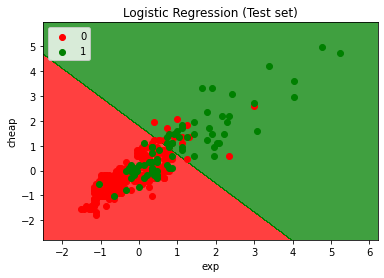

In [14]:
# Строим область значений. В этом случае отделение линейно. Зелёные точки - квартиры котоырое стоят больше 150тыс, красные точки - меньше 100тыс.
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('exp')
plt.ylabel('cheap')
plt.legend()
plt.show()

In [15]:
# Устанавливаем необходимые пакеты Keras.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
# Строим нейронную сеть прямой передачи сигнала. На входном слое 4 нейрона. relu - функция  позволит учесть наличие линейнносоти в исходных данных. На втором слое выбирем 1 нейрон используя сигмоидальную функцию. 
cnn = Sequential()
cnn.add(Dense(units = 4,  activation = 'relu', input_dim = 2))
cnn.add(Dense(units = 1,  activation = 'sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# Обучаем нейронную сеть в течении 100 эпох.
cnn.fit(X_train, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
204/204 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7555
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7978
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8107
Epoch 4/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8186
Epoch 5/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8192
Epoch 6/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8284
Epoch 7/100
204/204 [==============================] - 0s 906us/step - loss: 0.3708 - accuracy: 0.8395
Epoch 8/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8480
Epoch 9/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8493
Epoch 10/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3600 - accu

204/204 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8560
Epoch 81/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8566
Epoch 82/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8560
Epoch 83/100
204/204 [==============================] - ETA: 0s - loss: 0.3432 - accuracy: 0.85 - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8554
Epoch 84/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8572
Epoch 85/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8566
Epoch 86/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8566
Epoch 87/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8578
Epoch 88/100
204/204 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8542
Epoch 89/100
204/204 [==============================]

In [26]:
# Строим прогноз на тестовой выборке.
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.7)

In [27]:
# Строим таблицу сопряженности. Исходя из этого  47 положительных случая ложно определены как отрицательные и 6 негативных исходов определены как отрицательные. Всего модель распознала 355 объектоd верно. Как видим нейронна сеть показывает примерно такие же результаты.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[326   6]
 [ 47  29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


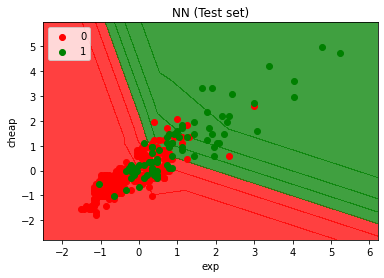

In [20]:
# Строим область значений. Они отделяются  не линейно. Однако после усложения модели после увеличения входных нейронов с 2 до 4, качество модели улучшилось. 
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('exp')
plt.ylabel('cheap')
plt.legend()
plt.show()

In [21]:
# Выводы. Исходя из анализа можно сделать вывод, что исходная логистическая модель обладает высоким качеством точности и определяет 84% объектов верно. Еще я бы отметил, что позитивные и негативные значения отделяются линейно. Эту линейность мы используем для построения нейронной сети. При использовании стандартных параметров мы получаем качество модели немного лучше, но при этом сохраняется линейность отделения позитивных от негативных. Для улучшения качества модели было принято решение увеличить количество нейронов на первом слое с 2 до 4, что позволило немного улучшить качество модели в целом, однако разделение положительных от отрицательных более не линейно.